# 2 Prediction Challenge

#### Ruiqi Zhu(s194822)

In the prediction challenge, the demand for the bike-sharing system will be predicted by different train/test set at a city level.

## Data analysis for prediction

In [2]:
f = pd.read_csv("Trips_2018.csv")

The demand for the bike-sharing system can be weighed as numbers of pickups by the hour. It's easy to find that all station informatations are useless since the prediction will be analysed at a city level. In order to get a clean data, it's good to drop all useless columns at the beginning.

In [ ]:
#remove the unwanted columns and only keep starttime
f = f.drop(columns=['Unnamed: 0','start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','stoptime','bikeid']) 

The original data from Citi Bike (New York) doesn't have the number of pickups by the hour data. It's necesary to calculate the numbers of pickup and then create a new column called 'Nb_pickups'.

In [3]:
#datetime format conversions
f['starttime']=pd.to_datetime(f['starttime'], format="%Y-%m-%d %H:%M:%S")

In [4]:
#create pickups column by calcaluating the size of starttime
df=f.groupby([pd.Grouper(key='starttime',freq='H')]).size().reset_index(name='Nb_pickups')

Float() argument must be a string or a number, not datetime. Considering of regression in following step, two new int columns called 'hour','day' can be created here.

In [5]:
df['hour'] = pd.to_datetime(df['starttime']).dt.hour
df['day'] = pd.to_datetime(df['starttime']).dt.day

In [44]:
x=np.c_[np.ones(len(df)),df['hour'], df['day']]
y= np.array(df['Nb_pickups'], ndmin=2).T

## Part 1

In part 1, the idea is to predict the pickups of the next 7 days given 2 months of data. January and February were chosen here.

In [45]:
#Janaray has 31 days and February has 28 days in 2018. The train set is (31+28)*24=1392
split=1392
x_train = x[:split]
x_test =x[split:split+168]
y_train = y[:split]
y_test = y[split:split+168]

In [46]:
#fit(x_train, y_train)
#get regr.coef_

[[134.2704086   48.89387556  25.82958768]]


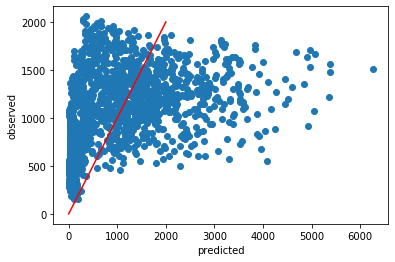

In [47]:
#use a 45 degree plot to see predicted pickups VS observed pickups

It looks awful. In order to get a high R2, I decided to choose a high variance model.

In [10]:
#MAE and RMSA

Mean Absolute error (MAE): 752.51
Root Mean squared error: 978.33


In [11]:
#correlation

,Nb_pickups,hour,day
Nb_pickups,1.000000,3.721882e-01,9.411572e-03
hour,0.372188,1.000000e+00,4.848940e-18
day,0.009412,4.848940e-18,1.000000e+00


Lagged Variable Regression is a high variance model and always has a high R2. 

In [15]:
f_lagged=buildLaggedFeatures(df, ['Nb_pickups'], lag=168)
fllen=len(f_lagged)

In [16]:
#1248 is a split of first two months data
f_lagged[:1248]

,starttime,Nb_pickups,hour,day,Nb_pickups_lag1,Nb_pickups_lag2,Nb_pickups_lag3,Nb_pickups_lag4,Nb_pickups_lag5,Nb_pickups_lag6,...,Nb_pickups_lag159,Nb_pickups_lag160,Nb_pickups_lag161,Nb_pickups_lag162,Nb_pickups_lag163,Nb_pickups_lag164,Nb_pickups_lag165,Nb_pickups_lag166,Nb_pickups_lag167,Nb_pickups_lag168
168,2018-01-08 00:00:00,43,0,8,94.0,140.0,169.0,209.0,293.0,398.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
169,2018-01-08 01:00:00,24,1,8,43.0,94.0,140.0,169.0,209.0,293.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
170,2018-01-08 02:00:00,17,2,8,24.0,43.0,94.0,140.0,169.0,209.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
171,2018-01-08 03:00:00,13,3,8,17.0,24.0,43.0,94.0,140.0,169.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
172,2018-01-08 04:00:00,35,4,8,13.0,17.0,24.0,43.0,94.0,140.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,2018-02-28 19:00:00,3275,19,28,4989.0,5739.0,3389.0,2609.0,2436.0,2339.0,...,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0,2210.0,3499.0
1412,2018-02-28 20:00:00,2198,20,28,3275.0,4989.0,5739.0,3389.0,2609.0,2436.0,...,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0,2210.0
1413,2018-02-28 21:00:00,1575,21,28,2198.0,3275.0,4989.0,5739.0,3389.0,2609.0,...,1150.0,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0,1133.0
1414,2018-02-28 22:00:00,1134,22,28,1575.0,2198.0,3275.0,4989.0,5739.0,3389.0,...,1687.0,1150.0,320.0,58.0,57.0,76.0,159.0,305.0,639.0,961.0


In [17]:
prediction7Days=f_lagged[:1248]
prediction7Days=prediction7Days.drop(columns=['starttime','hour','day','Nb_pickups'])

In [19]:
yprediction7Days=f_lagged['Nb_pickups']
yprediction7Days=yprediction7Days[:1248]

In [20]:
#prediction data for 7 days

array([1134., 1575., 2198., 3275., 4989., 5739., 3389., 2609., 2436.,
       2339., 2175., 1709., 1865., 3568., 5488., 3168., 1420.,  379.,
         64.,   35.,   71.,  134.,  277.,  523.,  962., 1427., 1956.,
       3148., 4970., 5071., 3239., 2634., 2354., 2312., 2167., 1794.,
       1814., 3504., 5357., 3092., 1401.,  370.,   56.,   31.,   34.,
         89.,  211.,  464.,  908., 1313., 1976., 2967., 4672., 4896.,
       2804., 2123., 1966., 1780., 1707., 1379., 1474., 2864., 4504.,
       2730., 1308.,  347.,   46.,   27.,   39.,   90.,  186.,  329.,
        556.,  757.,  937., 1272., 1518., 1677., 1751., 1548., 1275.,
       1039.,  880.,  569.,  454.,  363.,  220.,   85.,   22.,   13.,
         22.,   84.,  165.,  246.,  368.,  433.,  430.,  478.,  790.,
       1051., 1292., 1221., 1198.,  898., 2481., 2674., 2779., 2776.,
       2324., 1808., 1075.,  519.,  237.,   83.,   70.,  118.,  152.,
        242.,  421.,  529.,  650.,  867., 1188., 1677., 1897., 1969.,
       1514., 1303.,

In [21]:
x=np.c_[np.ones(len(prediction7Days)),prediction7Days]

In [22]:
y=np.array(yprediction7Days, ndmin=2).T

In [23]:
#check shape

x (1248, 169)
y (1248, 1)


In [24]:
#regr.fit(x, y)

Coefficients: 
 [[ 1.01119708e+02  1.27586231e+00 -6.80828553e-01  2.88780547e-01
  -7.12948776e-02 -1.36627894e-02  2.14996942e-02 -7.43530627e-02
  -4.36493943e-02  3.77092119e-01 -2.83725089e-01  5.34279160e-02
   4.93339190e-02 -1.22159827e-01  9.50806326e-02 -7.70134605e-02
   6.57566405e-02  1.07725565e-01 -2.11473265e-01  8.74872278e-02
   9.25793339e-03 -9.54100019e-02  1.54613092e-01 -1.56152099e-01
   4.97175651e-01 -5.28390087e-01  1.85937910e-01 -5.88043989e-04
  -5.42013487e-02  5.32170470e-02  3.53489046e-03  9.46101158e-03
  -4.20824002e-02 -2.89380528e-02 -1.71244426e-02  9.63633348e-02
  -1.19799975e-01  1.07934400e-01 -3.26545019e-02 -7.60539842e-02
   9.38550801e-02 -9.06469287e-02  6.67959865e-02  6.82436274e-03
  -3.12318118e-02  2.57096211e-02  9.45731444e-03 -7.03404110e-02
   5.67425298e-02 -2.55249578e-02  2.81114537e-02 -1.58665571e-02
   2.16016409e-02 -4.72726336e-02  6.02436064e-02 -6.84391622e-02
   1.11989401e-01 -1.61434331e-01  7.93395421e-02 -1.7795014

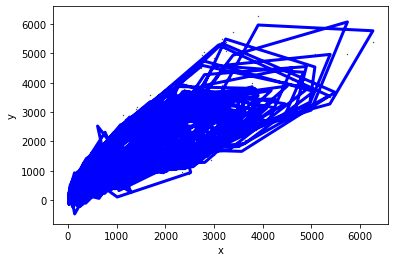

In [25]:
my_plot(regr, x, y)

## Part 2

In part 2, the idea is to predict the pickups of November and December given first 10 months of data. 
Considering of the concept of generalization, it needs to transforms one value into a more imprecise one. I came up with two ideas. First one is to generalize the number of pickups by hour to by day. The other is to divide 24 hours to three time intervals(8 hours per each). Appearantly, the second one will have a higher accuracy compared to the first one in regression models.
I decided to try first one first to see if R squared is higher than 0.3.

In [26]:
#generalize the number of pickups by hour to by day
x=np.c_[np.ones(len(df)), df['day']]
y= np.array(df['Nb_pickups'], ndmin=2).T

In [28]:
#November have 30 days and December have 31 days
split=-61
x_train = x[:split]
x_test =x[split:]
y_train = y[:split]
y_test = y[split:]

In [29]:
#fit(x_train, y_train)
#get regr.coef_

[[1957.95730733    3.32790944]]


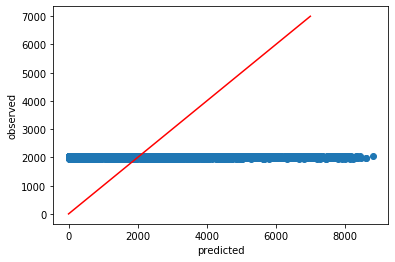

In [31]:
#use a 45 degree plot to see predicted pickups VS observed pickups

In [32]:
#MAE and RMSA

Mean Absolute error (MAE): 1512.62
Root Mean squared error: 1862.46


It looks awful. In order to get a high R2, I decided to use Lagged Variable Regression again.

In [33]:
f_lagged=buildLaggedFeatures(df, ['Nb_pickups'], lag=61)
fllen=len(f_lagged)

In [34]:
f_lagged[:-61]

,starttime,Nb_pickups,hour,day,Nb_pickups_lag1,Nb_pickups_lag2,Nb_pickups_lag3,Nb_pickups_lag4,Nb_pickups_lag5,Nb_pickups_lag6,...,Nb_pickups_lag52,Nb_pickups_lag53,Nb_pickups_lag54,Nb_pickups_lag55,Nb_pickups_lag56,Nb_pickups_lag57,Nb_pickups_lag58,Nb_pickups_lag59,Nb_pickups_lag60,Nb_pickups_lag61
61,2018-01-03 13:00:00,990,13,3,922.0,853.0,940.0,1883.0,2651.0,1462.0,...,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0,119.0
62,2018-01-03 14:00:00,1150,14,3,990.0,922.0,853.0,940.0,1883.0,2651.0,...,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0,168.0
63,2018-01-03 15:00:00,1212,15,3,1150.0,990.0,922.0,853.0,940.0,1883.0,...,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0,98.0
64,2018-01-03 16:00:00,1643,16,3,1212.0,1150.0,990.0,922.0,853.0,940.0,...,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0,72.0
65,2018-01-03 17:00:00,2681,17,3,1643.0,1212.0,1150.0,990.0,922.0,853.0,...,444.0,385.0,349.0,218.0,162.0,116.0,68.0,39.0,26.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8694,2018-12-29 06:00:00,172,6,29,71.0,79.0,129.0,181.0,319.0,428.0,...,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0,2389.0
8695,2018-12-29 07:00:00,383,7,29,172.0,71.0,79.0,129.0,181.0,319.0,...,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0,1863.0
8696,2018-12-29 08:00:00,820,8,29,383.0,172.0,71.0,79.0,129.0,181.0,...,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0,1358.0
8697,2018-12-29 09:00:00,1407,9,29,820.0,383.0,172.0,71.0,79.0,129.0,...,230.0,85.0,41.0,74.0,115.0,256.0,410.0,574.0,747.0,900.0


In [35]:
prediction2Months=f_lagged[:-61]
prediction2Months=prediction2Months.drop(columns=['starttime','hour','Nb_pickups',
                                             'day'])

In [36]:
yprediction2Months=f_lagged['Nb_pickups']

In [37]:
yprediction2Months=yprediction2Months[:-61]

In [39]:
x=np.c_[np.ones(len(prediction2Months)),prediction2Months]

In [40]:
y=np.array(yprediction2Months, ndmin=2).T

In [41]:
#regr.fit(x, y)

Coefficients: 
 [[ 8.52818470e+01  1.28744161e+00 -6.91102421e-01  2.49696810e-01
  -8.03903712e-02  9.02997701e-03  5.72882783e-03 -5.34740088e-02
  -5.12406886e-02  3.27552811e-01 -2.02749564e-01 -8.93523477e-03
   7.77475604e-02 -9.91763295e-02  1.41610673e-01 -5.21600673e-02
  -7.70758160e-02  1.26107692e-01 -1.14379746e-01  1.15406204e-02
   3.85597263e-02 -6.03499662e-02  5.33545311e-02  3.81972844e-02
   5.04431830e-01 -6.46901953e-01  2.59181226e-01 -5.16692286e-02
   3.33562955e-02 -4.56589509e-02  3.81964361e-02  4.06810431e-02
  -6.12285885e-02 -7.83849099e-02  9.91174587e-03  5.70880468e-02
  -4.90380525e-02  1.97743170e-02 -5.27027820e-02  3.78396445e-02
  -8.37670639e-03  1.40621611e-02 -1.21726305e-02  4.90580245e-02
  -1.83858146e-02  1.94149204e-02  2.66891211e-03 -3.05070859e-02
   9.64986078e-02 -8.10286189e-02  7.72833068e-02 -3.96450368e-02
   2.20365855e-02 -3.87015812e-03  2.61586284e-04 -1.33446007e-02
   4.39278927e-02 -5.14692409e-02  1.09451049e-02 -5.5485720

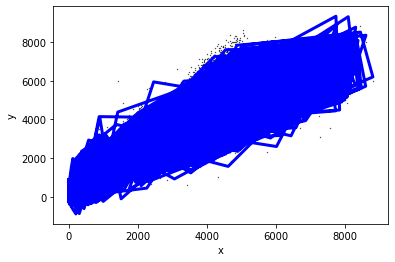

In [42]:
my_plot(regr, x, y)

## Conclusion

Generally, Lagged Variable Regression is a good model which has a high accuracy. The difference between RMSE and MAE is always lower than the orignal one. It means the variance in the individual errors decreased.
I also tried Ridge and Lasso model which normally have a good performance and can normalize data automatically. It only gives 0.14 as R squared.(codes shown in appendix)
It shows us the higher variance model fits discrete data more.

## Reflection

1. The numbers of pickups are not accurate here. All trip duration which are more than one hour should be counted in by adding 1 pickup number in the next hours.
2. In part 2, even though I generalized pickup per hour to per day, I still used a high variance model which could cause overfit. 

# Appendix

In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
import datetime as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

The code can not be run in this part since the whole codes were splitted in report and appendix. There is an individual notebook called "Appendix 2". That can be run all.

In [ ]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train);
print(regr.coef_)

In [ ]:
plt.scatter(y_train, regr.predict(x_train))
plt.xlabel("predicted")
plt.ylabel("observed")
plt.plot([0, 7000], [0, 7000], color="red")
plt.show()

In [ ]:
print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(x_train) - y_train)))
# The mean squared error
print("Root Mean squared error: %.2f"
      % np.sqrt(np.mean((regr.predict(x_train) - y_train) ** 2)))

In [ ]:
df.corr()

In [ ]:
#prediction data for 7 days
prediction7Day = prediction7Days.iloc[-1].to_numpy()

In [ ]:
print("x", x.shape)
print("y", y.shape)

In [ ]:
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

In [ ]:
def buildLaggedFeatures(s,columns, lag=168,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [ ]:
def my_plot(regr, X, y, Xlab="x", ylab="y", size=0.1, reg=True):

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean absolute error    
    print("Mean Absolute error (MAE): %.2f"% np.mean(abs(regr.predict(X) - y)))
    # The mean squared error
    print("Root Mean squared error: %.2f"
          % np.sqrt(np.mean((regr.predict(X) - y) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, y))

    if X.shape[1]>1:
        X_uni=X[:,1]
    else:
        X_uni=X
            
    # Plot outputs
    plt.scatter(X_uni, y,  color='black', s=size)
    if reg:
        plt.plot(X_uni, regr.predict(x), color='blue',linewidth=3)
    plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=10)    # fontsize of the tick labels
    plt.xlabel(Xlab)
    plt.ylabel(ylab)

    plt.show()

## Ridge regression

In [ ]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
y=df['Nb_pickups'].to_numpy()
y=y.reshape(-1,1)

X=df['hour'].to_numpy()
X=X.reshape(-1,1)

In [ ]:
alphas = 10**np.linspace(-10, 10, 100)

In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)
hour_coefficients = [coef[0] for coef in coefs]

In [ ]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, hour_coefficients, label="hour coefficient")

plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
for alpha in [alphas[0], alphas[50], alphas[-1]]:
    ridge = Ridge(normalize=True, alpha=alpha)
    ridge.fit(x_train, y_train)
    print("alhpa = {}".format(alpha))
    print("R^2 on train data is {} and on test data is {}".format(ridge.score(x_train, y_train), 
                                                              ridge.score(x_test,y_test)))
    print("")

In [ ]:
split=1392
x_train = X[:split]
x_test =X[split:split+168]
y_train = y[:split]
y_test = y[split:split+168]

In [ ]:
ridgecv = RidgeCV(alphas = alphas, normalize = True)
ridgecv.fit(x_train, y_train)
ridgecv.alpha_

In [ ]:
score = ridgecv.score(x_train, y_train)

In [ ]:
print("R^2 on train data is {} and on test data is {}".format(ridgecv.score(x_train, y_train), 
                                                              ridgecv.score(x_test,y_test)))

## The Lasso

In [ ]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
np.shape(coefs)
hour_coefficients = [coef[0] for coef in coefs]

In [ ]:
ax = plt.gca()
ax.set_xscale('log')
ax.plot(alphas, hour_coefficients, label="hour coefficient")
plt.legend()
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [ ]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)

In [ ]:
print("R^2 on train data is {} and on test data is {}".format(lassocv.score(X_train, y_train), 
                                                              lassocv.score(X_test,y_test)))